Ali Ataollahi

810199461

AI-CA5-Neural-Networks

# Requirements

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Part 1 : Preprocessing

#### Q1

In [38]:
train_data = pd.read_csv("DataSet/TrainImgs.csv")
train_labels_data = pd.read_csv("DataSet/TrainLabels.csv")
test_data = pd.read_csv("Dataset/TestImgs.csv")
test_labels_data = pd.read_csv("Dataset/TestLabels.csv")

In [39]:
print(train_labels_data)
print(train_labels_data['1'].unique())

        1
0       1
1       1
2       1
3       1
4       1
...    ..
13434  28
13435  28
13436  28
13437  28
13438  28

[13439 rows x 1 columns]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


In train data we have 28 lables.

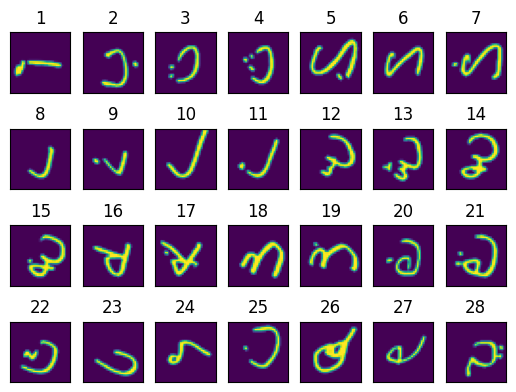

In [40]:
classes = train_labels_data['1'].unique()

first_index_of_classes, classe_labels = [], []
for x in classes:
    index = train_labels_data.index[train_labels_data['1'] == x][0]
    first_index_of_classes.append(train_data.iloc[index])
    classe_labels.append(train_labels_data.iloc[index]['1'])

figure, axes = plt.subplots(math.ceil(len(classes) / 7), 7)
for i in range(len(classes)):
    pic = np.array(first_index_of_classes[i]).reshape(32, 32)
    new_axes = axes.flatten()[i]
    new_axes.imshow(pic)
    new_axes.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
    new_axes.set_title(classe_labels[i])

#### Q2

In [41]:
print("value of pixels : [{}:{}]".format(train_data.values.min(), 
                                         train_data.values.max()))

value of pixels : [0:255]


#### Q3

In [42]:
print('number of classes :', len(train_labels_data['1'].unique()))
print('number of data :', len(train_data))

number of classes : 28
number of data : 13439


#### Q4

Now we choose first 16 letters and ignore other ones.

In [43]:
def shape_classes(data, labels):
    data.drop(labels.index[labels['1'] > 16], inplace=True)
    labels.drop(labels.index[labels['1'] > 16], inplace=True)
    
shape_classes(train_data, train_labels_data)
shape_classes(test_data, test_labels_data)

#### Q5

In next step we plot freq of classes.

1 
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
1     479
dtype: int64


<AxesSubplot: title={'center': 'count of train classes'}, xlabel='1'>

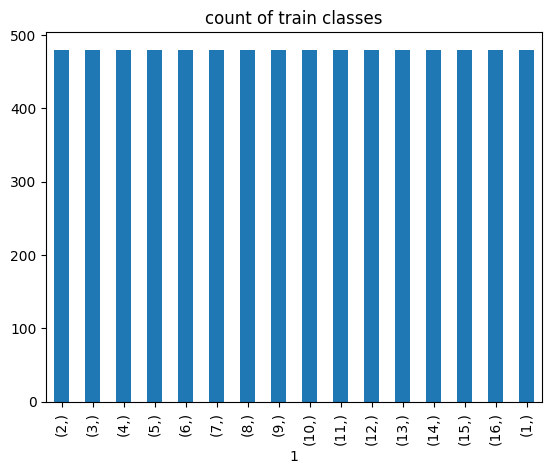

In [44]:
print(train_labels_data.value_counts())
train_labels_data.value_counts().plot(kind='bar', title='count of train classes')

1 
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
11    120
12    120
13    120
14    120
15    120
16    120
1     119
dtype: int64


<AxesSubplot: title={'center': 'count of test classes'}, xlabel='1'>

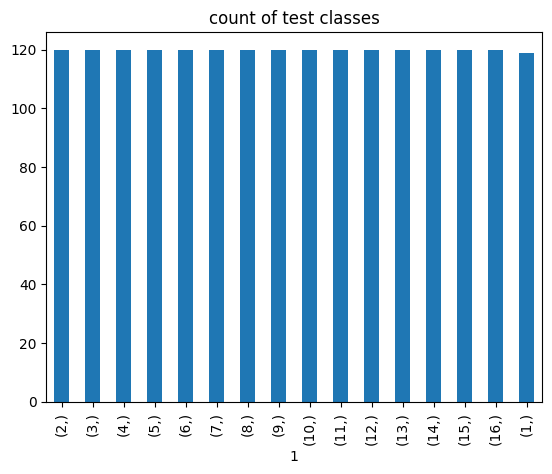

In [45]:
print(test_labels_data.value_counts())
test_labels_data.value_counts().plot(kind='bar', title='count of test classes')

#### Q6
What is the problem when we do not scale pixels?

If we use inputs with large integer values, learning process can be slowed down or disrupt. So in neural networks process we use small weight values. Hence we scale and normalize pixels that each pixel has a value 0 to 1.


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
test_data[test_data.columns] = scaler.fit_transform(test_data[test_data.columns])

#### Q7

Job has done in TODO codes

Why should we use one-hot encoding?

Most of ml algorithms operate on numeric data directly and cannot operate on label data. Also, this is a efficient way implementation of ml algorithms rather than hard limits on the algorithms themselves.<br>
So we convert categorical data to a numerical form. Categorical variable can be an output variable. We may also want to convert predicts by the model back into a categorical in order to use in applications or to present them use them.<br>
A one-hot encoding can be applied to represent the integer form, where the integer encoded variable is removed and a for each unique integer value, binary variable is added .Also when a certain input is present, this encoding shows the fact that you want to force your neural network to have a single high-activation output.

# Part 1 : complete TODO codes

# Dataloader

In [47]:
from sklearn.preprocessing import OneHotEncoder

class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)

        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        return pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        perm = np.random.permutation((self.__data.shape[0]))
        self.__data = self.__data[perm]
        self.__onehot_labels = self.__onehot_labels[perm]

    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return

        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

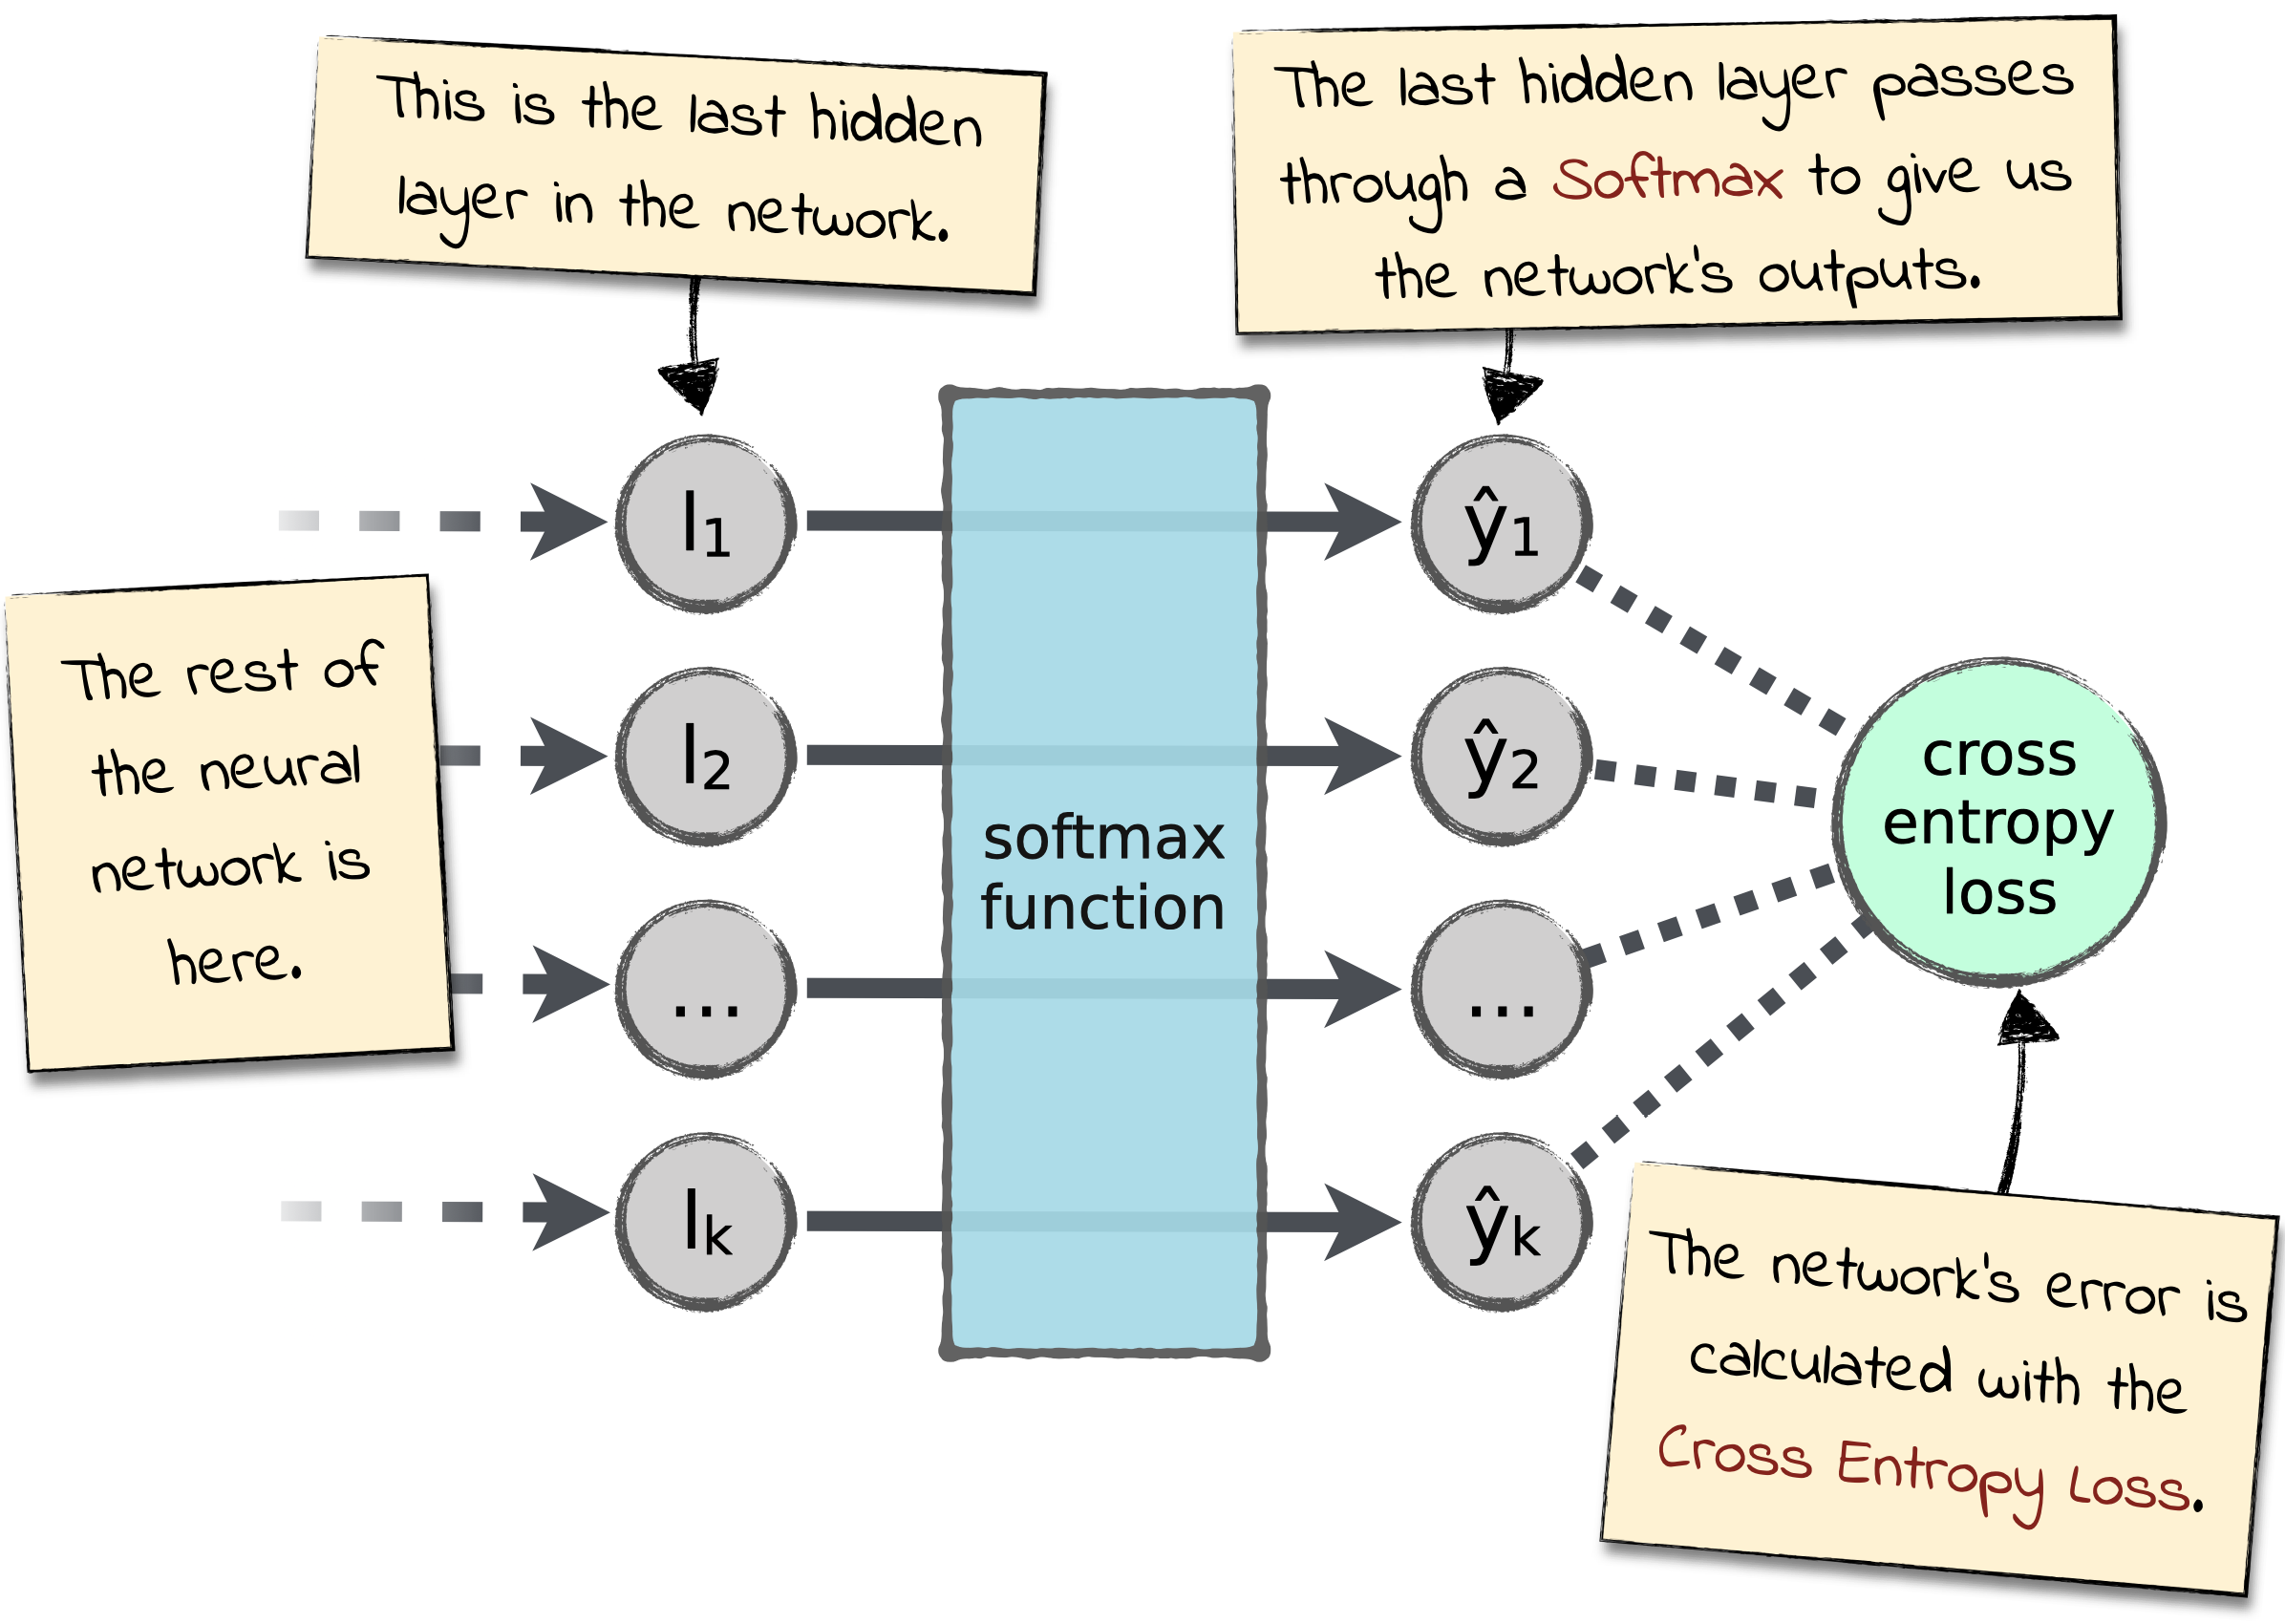

In [48]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        return np.matrix(matrix, dtype=float)

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        return np.matrix(np.full(np.shape(temp), 1.))
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
        
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        return np.maximum(0, temp)

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        return np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, 0)))
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        return np.where(temp < 0, temp * self.negative_slope, temp)

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        return np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, self.negative_slope)))
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of sigmoid activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        return 1/(1 + np.exp(-temp))

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        temp = self.__val(temp)
        return np.multiply(temp, (1 - temp))
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
        

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                softmax_value: np.matrix of softmax activation function result
        '''
        temp = np.matrix(matrix, dtype=float)    
        return np.apply_along_axis(lambda row: np.exp(row - np.max(row))/np.sum(np.exp(row - np.max(row))), 1, temp)
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    '''
    tanh is also like logistic sigmoid but better. 
    The range of the tanh function is from (-1 to 1).
    tanh is also sigmoidal (s - shaped).
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix): # check
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        return np.matrix(np.tanh(temp))

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        return 1 - np.power(self.__val(temp), 2)
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

# Loss Function

In [49]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        
        temp = np.matrix(true_val, dtype=float)
        output = np.log(Softmax()(temp))
        expected = np.matrix(expected_val, dtype=float)
        
        cross_entropy_value =  -1 * np.sum(np.multiply(expected, output), axis=1)
        
        return cross_entropy_value
    
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
                                           
        temp = np.matrix(true_val, dtype=float)
        output = Softmax()(temp)
        expected = np.matrix(expected_val, dtype=float)
                                           
        cross_entropy_derivative = output - expected
                                           
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [50]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 
                                          'normal':self.__normal_weight, 
                                          'zero':self.__zero_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
                
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        ones = np.matrix(np.ones((np.size(backprop_tensor,axis=0), 1)))

        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        db = np.matmul(ones.T, dy)
        dw = np.matmul(self.__last_input.T, dy)
        temp = np.matmul(dy, np.transpose(self.__weight))
        self.__weight -= lr * dw
        self.__bias -= lr * db
        
        return temp

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        
        return np.matrix(np.random.uniform(low, high, size=(dim1, dim2)))

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        return np.matrix(np.random.normal(mean, np.sqrt(var), size=(dim1, dim2)))
    
    # Not necessary
    def __zero_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as 0.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
        Returns:
            np.matrix with size (dim1, dim2) initialized using 0 values.
        ''' 
        return np.matrix(np.zeros(shape=(dim1,dim2)))
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [51]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"

        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        batch_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(batch_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        batch_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)

        return np.mean(batch_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))

        self.__update_weights(network_output, y_batch)

        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        network_output = self.forward(x_batch)

        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        return outputs.argmax(1)
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        labels = self.__get_labels(output)
        expected_labels = self.__get_labels(expected_output)
        return np.count_nonzero(labels == expected_labels) / np.size(output, axis=0) * 100
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backpropagation_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backpropagation_tensor = layer.update_weights(backpropagation_tensor, self.__lr)
        return

# Part 3 : Classifying data

## Q1 - Training network model

#### Q1-1

First we define constants and contrains.

In [52]:
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 32
INPUT_SHAPE = 32 * 32

Then we use a train func and use it in next parts for training models. Then we train it with no parameters and with default values.

In [53]:
def train_model(activation=LeakyRelu(), initial='uniform', lr=LEARNING_RATE, epochs=EPOCHS, batch_size=BATCH_SIZE, print_results=True):
    TRAINLOADER = Dataloader(train_data, train_labels_data, n_classes=16, batch_size=batch_size, shuffle=False)
    TESTLOADER = Dataloader(test_data, test_labels_data, n_classes=16, batch_size=batch_size, shuffle=False)
    
    network = FeedForwardNN(INPUT_SHAPE)
    network.add_layer(36, activation=activation, initial_weight=initial)
    network.add_layer(16, activation=Identical(), initial_weight=initial)
    network.set_training_param(loss=CrossEntropy(), lr=lr)
    
    log = network.fit(epochs, TRAINLOADER, TESTLOADER, print_results=print_results)
    return log

In [54]:
train_model()

Epoch 1:
	Train: Average Accuracy: 12.60542674731183	Average Loss: 2.5981667646071345
	Test: Average Accuracy: 29.858870967741936	Average Loss: 2.0918777047407855
Epoch 2:
	Train: Average Accuracy: 33.74075940860215	Average Loss: 1.9315355563898522
	Test: Average Accuracy: 39.237231182795696	Average Loss: 1.7470744686812043
Epoch 3:
	Train: Average Accuracy: 43.93649193548387	Average Loss: 1.6136541182053117
	Test: Average Accuracy: 45.023521505376344	Average Loss: 1.5483928369564843
Epoch 4:
	Train: Average Accuracy: 49.43212365591398	Average Loss: 1.4115723927058104
	Test: Average Accuracy: 50.29233870967742	Average Loss: 1.4019834028429452
Epoch 5:
	Train: Average Accuracy: 53.67775537634408	Average Loss: 1.266021954749017
	Test: Average Accuracy: 52.481518817204304	Average Loss: 1.3262742993166126
Epoch 6:
	Train: Average Accuracy: 57.58484543010753	Average Loss: 1.1531195610325766
	Test: Average Accuracy: 54.46068548387097	Average Loss: 1.279002148283797
Epoch 7:
	Train: Average A

{'train_accuracy': [12.60542674731183,
  33.74075940860215,
  43.93649193548387,
  49.43212365591398,
  53.67775537634408,
  57.58484543010753,
  60.644741263440864,
  64.16162634408602,
  66.54527889784946,
  68.64205309139786,
  70.54351478494624,
  72.56174395161291,
  74.39726142473118,
  75.53007392473118,
  77.11903561827958,
  77.78267809139786,
  79.33257728494624,
  80.1663306451613,
  81.44279233870968,
  82.60164650537634,
  84.15112567204301,
  85.41414650537634,
  86.27352150537634,
  87.18497983870968,
  88.42237903225806,
  88.99529569892474,
  89.38634072580645,
  90.24571572580645,
  91.56081989247312,
  91.74311155913979,
  92.47269825268816,
  92.81123991935483,
  93.74915994623656,
  94.13936491935483,
  94.67363911290322,
  95.33770161290322,
  95.81989247311827,
  96.05426747311827,
  96.31468413978494,
  96.70530913978494,
  97.04427083333333,
  97.39583333333333,
  97.72135416666667,
  97.87760416666667,
  98.08551747311827,
  98.34635416666667,
  98.4375,
  98.

#### Q1-2

For this we should change add_layer in train_model. this job has done.

## Q2 - Weighting network model

#### Q2-1

What is result if weights is zero and give to model bias ? <br>
If do this, it leads to learn the same features during training for the neurons. In fact, for any constant init scheme will perform very poorly. This problem is known as network failing to break symmetry<br>
For example a neural network with two hidden units, and assume we initialize all the biases to 0 and the weights with some constant α.<br>
source : deeplearning.ai

In [55]:
# train_model(initial='zero')

## Q3 - Learning rate effect

#### Q3-1

Our learning rate affects process of learning in all network we modeled. So it changes accuracy we gain. So we have case in wrong lrs :

- Too small : increases the time for the model to find the optimal results
- Too big : our model may diverge and never find the weight and biases that are optimal


In [56]:
lr_set = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
for lr in lr_set:
    print("learning rate is : {}".format(lr))
    train_model(lr=lr, epochs=10)
    print("============================================================================================================")

learning rate is : 0.0005
Epoch 1:
	Train: Average Accuracy: 3.7369791666666665	Average Loss: 2.810734002254649
	Test: Average Accuracy: 6.305443548387097	Average Loss: 2.7094952497386893
Epoch 2:
	Train: Average Accuracy: 5.354082661290323	Average Loss: 2.7580550749792567
	Test: Average Accuracy: 9.798387096774194	Average Loss: 2.6439084484630277
Epoch 3:
	Train: Average Accuracy: 10.823672715053764	Average Loss: 2.638729048314212
	Test: Average Accuracy: 15.68380376344086	Average Loss: 2.4892968069629884
Epoch 4:
	Train: Average Accuracy: 15.511592741935484	Average Loss: 2.4646276965825193
	Test: Average Accuracy: 22.819220430107528	Average Loss: 2.332841303405756
Epoch 5:
	Train: Average Accuracy: 23.402637768817204	Average Loss: 2.320231877622815
	Test: Average Accuracy: 29.12466397849462	Average Loss: 2.201973640486481
Epoch 6:
	Train: Average Accuracy: 29.677839381720432	Average Loss: 2.192197284222178
	Test: Average Accuracy: 33.655913978494624	Average Loss: 2.079632595196165
Ep

For epoch = 10, best accuracies are :<br>
lr = 0.0005 : train_acc = 39.93, test_acc = 40.68 <br>
lr = 0.001 : train_acc = 50.00, test_acc = 48.50 <br>
lr = 0.005 : train_acc = 66.25, test_acc = 58.26 <br>
lr = 0.01 : train_acc = 55.61, test_acc = 48.56 <br>
lr = 0.05 : train_acc = 31.53, test_acc = 37.31 <br>
lr = 0.1 : train_acc = 37.97, test_acc = 43.66 <br>

So best learning in this list is 0.005.

## Q4 - Activation function effect

#### Q4-1

In [57]:
import time

results = {}

activation_funcs = {
    'Sigmoid': Sigmoid(),
    'Hyperbolic Tangent': Tanh(),
    'Leaky Relu': LeakyRelu()
}

for activation in activation_funcs:
    first = time.time()
    activation_func = activation_funcs[activation]
    model = train_model(activation=activation_func, lr=LEARNING_RATE, print_results=False)
    end = time.time()
    results[activation] = {}
    results[activation]['train_accuracy'] = model['train_accuracy'][-1]
    results[activation]['test_accuracy'] = model['test_accuracy'][-1]
    results[activation]['run_time'] = end - first

In [58]:
for res in results:
    print(res, ' : ')
    for ele in results[res]:
        print(ele,'=',results[res][ele],end=' / ')
    print()

Sigmoid  : 
train_accuracy = 93.26780913978494 / test_accuracy = 71.13071236559139 / run_time = 368.78224325180054 / 
Hyperbolic Tangent  : 
train_accuracy = 99.89583333333333 / test_accuracy = 70.03024193548387 / run_time = 471.95077204704285 / 
Leaky Relu  : 
train_accuracy = 99.98697916666667 / test_accuracy = 69.71774193548387 / run_time = 622.5271284580231 / 


So best activation_func is Leaky Relu because in less time has better accuracy.

#### Q4-2

Why sigmoid and tanh have not good performance in this model ?<br>
negative point of this is that we have many layers in neural network, these layers will multiply these gradients, and the product if smaller than 1 values very quickly become zero. So it is important to know that Deep Learning has shown more layers helps a lot, but this disadvantage of the Sigmoid function exist. So we can't involve Deep Learning and Sigmoid and in Deep learning we can't use sigmoid. also when we use Hyperbolic Tangent, this disadvantage occures and we have this problem again.

#### Q4-3

Why Leaky Relu is better than Relu ?<br>
With a Leaky ReLU (LReLU), you won’t face the “dead ReLU” (or “dying ReLU”) problem which happens when your ReLU always have values under 0 - this completely blocks learning in the ReLU because of gradients of 0 in the negative part.
Now, think about the chain rule in the backward pass. If the derivative of the slope of the ReLU is of 0, absolutely no learning is performed on the layers below the dead ReLU, because 0 will be multiplied to the accumulated gradient for the weight update. Thus, you can have dead neurons. This problem doesn’t happen with LReLU or ELU for example, they will always have a little slope to allow the gradients to flow on.

source : https://www.quora.com/What-are-the-advantages-of-using-Leaky-Rectified-Linear-Units-Leaky-ReLU-over-normal-ReLU-in-deep-learning

## Q5 - Batch size effect

#### Q5-1

In [59]:
results = {}

sizes = [16, 256]

for size in sizes:
    first = time.time()
    model = train_model(batch_size=size, epochs=10, print_results=False)
    end = time.time()
    results[size] = {}
    results[size]['train_accuracy'] = model['train_accuracy'][-1]
    results[size]['test_accuracy'] = model['test_accuracy'][-1]
    results[size]['run_time'] = end - first

In [60]:
for res in results:
    print('batch size =',res,' : ')
    for ele in results[res]:
        print(ele,'=',results[res][ele],end=' / ')
    print()

batch size = 16  : 
train_accuracy = 65.33506944444444 / test_accuracy = 62.11805555555555 / run_time = 147.7944300174713 / 
batch size = 256  : 
train_accuracy = 26.721609477124183 / test_accuracy = 29.080416461614174 / run_time = 18.33225178718567 / 


So 16 is better batch size.

#### Q5-2

Batch size : the number of samples propagated through the network.<br>

Example : suppose we have 2100 training samples and batch_size we chooses is 500. The algorithm takes the first 500 samples (1 to 500) of train data frame and train network with that. In next stage, The algorithm takes the second 500 samples (501-1000) and trains the network with that and ... . We do this procedure until all samples have propagated through of the network. But there is a problem. Last set of samples in many models can't divisiable like this example that 100 last samples remain. The simplest solution is train network just with that remain samples in another side.<br>

Advantages of small batch size:

- It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.<br>

- Typically networks train faster with mini-batches. Updating network is with considering less data. Higher batch size means less training time. But higher batch size requires higher memory as well. 

Disadvanges of small batch size:

- it makes the gradient estimate noisy if we Keeping the batch size small which might allow us to bypass a local optimum during convergence. But having very small batch size would be too noisy for the model to convergence anywhere.

source : https://datascience.stackexchange.com/questions/72922/does-small-batch-size-improve-the-model

# Part 4 : Use Tensorflow and Keras

## Q1 - Preprocessing data and visualization

In [61]:
import tensorflow as tf

(input_train, output_train), (input_test, output_test) = tf.keras.datasets.cifar10.load_data()

### Q1-1

In [62]:
input_train = input_train.reshape(len(input_train), -1)
print(f"new shape of input_train : {input_train.shape}")
input_test = input_test.reshape(len(input_test), -1)
print(f"new shape of input_test : {input_test.shape}")

new shape of input_train : (50000, 3072)
new shape of input_test : (10000, 3072)


In [63]:
print(input_train)
print(input_test)

[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]
[[158 112  49 ...  21  67 110]
 [235 235 235 ... 186 200 199]
 [158 190 222 ...   7   8   7]
 ...
 [ 20  15  12 ...  25  20  47]
 [ 25  40  12 ...  92 120  80]
 [ 73  78  75 ...  27  26  26]]


### Q1-2

In [64]:
# normalize
MAX_VALUE = 255
input_train = input_train / MAX_VALUE
input_test = input_test / MAX_VALUE

In [65]:
print(input_train)
print(input_test)

[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
[[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]
 [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216]
 [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098]
 ...
 [0.07843137 0.05882353 0.04705882 ... 0.09803922 0.07843137 0.18431373]
 [0.09803922 0.15686275 0.04705882 ... 0.36078431 0.47058824 0.31372549]
 [0.28627451 0.30588235 0.29411765 ... 0.10588235 0.10196078 0.10196078]]


### Q1-3

In [66]:
import numpy as np
from tensorflow.keras.utils import to_categorical

class_num = len(np.unique(output_train))
one_hot_of_output_train = to_categorical(output_train, class_num)
one_hot_of_output_test =  to_categorical(output_test,  class_num)

In [67]:
print(class_num)
print(one_hot_of_output_train)
print(one_hot_of_output_test)

10
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Now we show 

### Q1-4

### Design Neural Network

In [68]:
LEARNING_RATE = 0.01
EPOCHS = 10
BATCH_SIZE = 32

In [69]:
import keras
from keras import optimizers, losses
from functools import partial

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, input_dim=input_train.shape[1], activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dense(128, activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=LEARNING_RATE), \
              loss=losses.categorical_crossentropy, metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


### Train and fit model

In [70]:
log = model.fit(input_train, one_hot_of_output_train, \
                epochs=EPOCHS, batch_size=BATCH_SIZE, \
                validation_data=(input_test, one_hot_of_output_test))

Epoch 1/10
1563/1563 [==============================] - 24s 14ms/step - loss: 1.8868 - accuracy: 0.3234 - val_loss: 1.8000 - val_accuracy: 0.3542
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.7020 - accuracy: 0.3971 - val_loss: 1.7066 - val_accuracy: 0.3932
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6201 - accuracy: 0.4257 - val_loss: 1.5883 - val_accuracy: 0.4421
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5629 - accuracy: 0.4495 - val_loss: 1.5716 - val_accuracy: 0.4396
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5159 - accuracy: 0.4642 - val_loss: 1.5906 - val_accuracy: 0.4213
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4785 - accuracy: 0.4773 - val_loss: 1.4781 - val_accuracy: 0.4732
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4456 - accuracy: 0.4892 - val_loss: 1.5470 - 

In [71]:
print(log.history)

{'loss': [1.886839509010315, 1.702022671699524, 1.620102047920227, 1.562939167022705, 1.5158889293670654, 1.478533148765564, 1.4455815553665161, 1.4181041717529297, 1.391369342803955, 1.3683643341064453], 'accuracy': [0.32335999608039856, 0.3971000015735626, 0.42566001415252686, 0.44947999715805054, 0.4641599953174591, 0.4772999882698059, 0.48921999335289, 0.4975999891757965, 0.5081400275230408, 0.5177199840545654], 'val_loss': [1.8000059127807617, 1.706604242324829, 1.5883265733718872, 1.5715787410736084, 1.5905650854110718, 1.4780513048171997, 1.5470470190048218, 1.4841376543045044, 1.4354945421218872, 1.4538800716400146], 'val_accuracy': [0.35420000553131104, 0.39320001006126404, 0.44209998846054077, 0.43959999084472656, 0.4212999939918518, 0.4731999933719635, 0.4480000138282776, 0.4681999981403351, 0.48350000381469727, 0.48510000109672546]}


Define some funcs for plot and visualization data.

In [72]:
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

def plot_util(title, xlabel, ylabel, val1, val2, report):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(report.history[val1])
    plt.plot(report.history[val2])
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_model(log):
    plot_util("accuracy plot", "epoch", "accuracy", "accuracy", "val_accuracy", log)
    plot_util("loss plot", "epoch", "loss", "loss", "val_loss", log)
    
def print_report(input, output, model):
    output_predict = np.argmax(model.predict(input), axis=1)
    print(classification_report(output, output_predict))

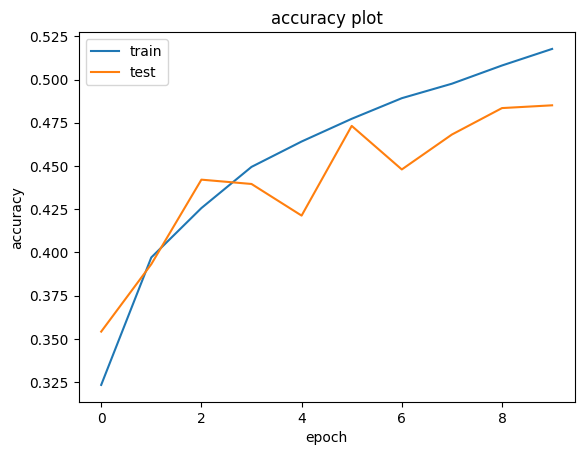

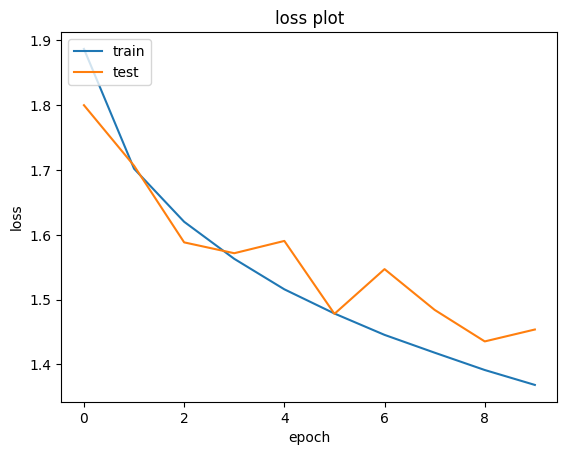

In [73]:
plot_model(log)

In [74]:
print_report(input_train, output_train, model)

1563/1563 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      5000
           1       0.57      0.75      0.65      5000
           2       0.46      0.36      0.40      5000
           3       0.34      0.50      0.41      5000
           4       0.50      0.43      0.46      5000
           5       0.40      0.46      0.43      5000
           6       0.72      0.29      0.41      5000
           7       0.56      0.66      0.61      5000
           8       0.72      0.59      0.65      5000
           9       0.59      0.59      0.59      5000

    accuracy                           0.52     50000
   macro avg       0.54      0.52      0.52     50000
weighted avg       0.54      0.52      0.52     50000



In [75]:
print_report(input_test, output_test, model)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.53      0.56      0.55      1000
           1       0.54      0.71      0.61      1000
           2       0.43      0.34      0.37      1000
           3       0.31      0.44      0.36      1000
           4       0.47      0.41      0.44      1000
           5       0.36      0.42      0.39      1000
           6       0.67      0.26      0.37      1000
           7       0.53      0.60      0.56      1000
           8       0.67      0.57      0.61      1000
           9       0.56      0.54      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



## Q2 - Check effect of parameters

### Q2-1 - Optimizer effect

#### Q2-1-1

Momentum : the gradient descent optimization algorithm extension, often use momentum when referred to gradient descent.

It is designed to:
- accelerate the optimization process. 
- decrease the number of function evaluations required to reach the optima 
- improve the capability of the optimization algorithm. 
- lead to better final result.

A momentum of 0 is the same as gradient descent without momentum.

#### Q2-1-2

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8415 - accuracy: 0.3390 - val_loss: 1.7121 - val_accuracy: 0.3824
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6567 - accuracy: 0.4100 - val_loss: 1.6962 - val_accuracy: 0.4045
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5774 - accuracy: 0.4390 - val_loss: 1.6152 - val_accuracy: 0.4199
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5219 - accuracy: 0.4582 - val_loss: 1.5123 - val_accuracy: 0.4591
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4771 - accuracy: 0.4746 - val_loss: 1.4787 - val_accuracy: 0.4780
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4378 - accuracy: 0.4902 - val_loss: 1.5443 - val_accuracy: 0.4512
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4079 - accuracy: 0.5004 - val_loss: 1.4685 - v

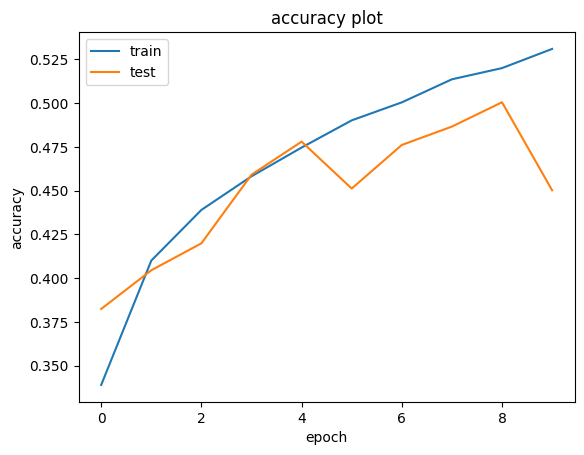

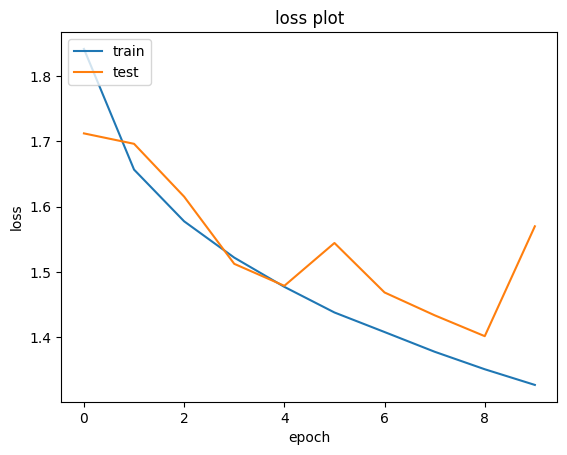

1563/1563 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.39      0.55      0.46      5000
           1       0.60      0.68      0.64      5000
           2       0.53      0.17      0.26      5000
           3       0.49      0.25      0.33      5000
           4       0.47      0.43      0.45      5000
           5       0.59      0.25      0.35      5000
           6       0.46      0.70      0.56      5000
           7       0.75      0.41      0.53      5000
           8       0.41      0.87      0.55      5000
           9       0.53      0.61      0.57      5000

    accuracy                           0.49     50000
   macro avg       0.52      0.49      0.47     50000
weighted avg       0.52      0.49      0.47     50000

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.37      0.52      0.43      1000
           1       0

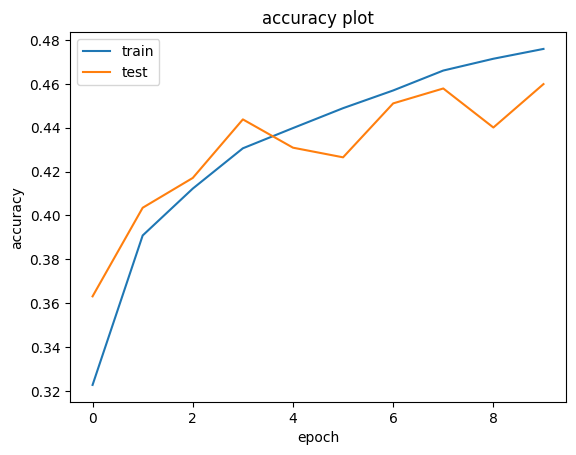

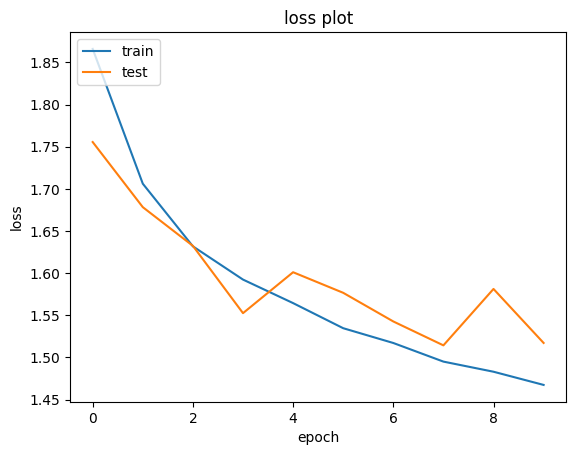

1563/1563 [==============================] - 13s 8ms/step
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      5000
           1       0.65      0.47      0.55      5000
           2       0.36      0.36      0.36      5000
           3       0.34      0.42      0.38      5000
           4       0.47      0.37      0.42      5000
           5       0.48      0.20      0.28      5000
           6       0.46      0.54      0.50      5000
           7       0.51      0.62      0.56      5000
           8       0.64      0.59      0.62      5000
           9       0.46      0.67      0.55      5000

    accuracy                           0.48     50000
   macro avg       0.49      0.48      0.47     50000
weighted avg       0.49      0.48      0.47     50000

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.53      0.56      0.54      1000
           1       

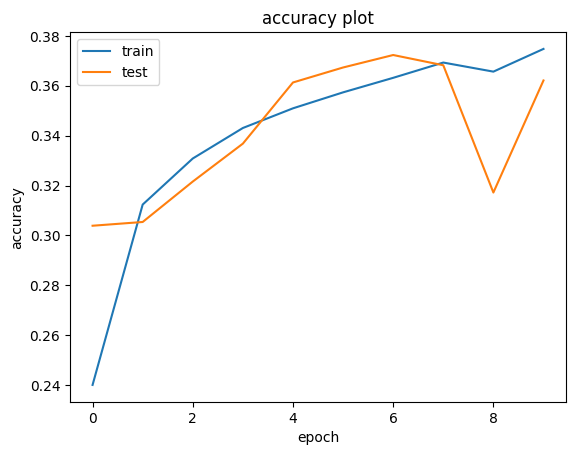

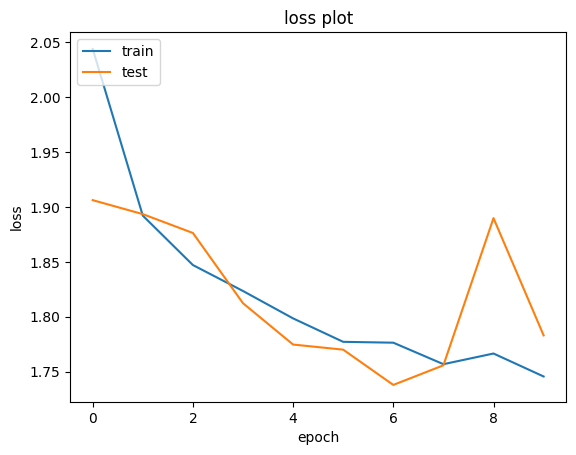

1563/1563 [==============================] - 4s 3ms/step
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      5000
           1       0.42      0.61      0.50      5000
           2       0.26      0.20      0.22      5000
           3       0.20      0.36      0.26      5000
           4       0.43      0.14      0.22      5000
           5       0.38      0.34      0.36      5000
           6       0.30      0.60      0.40      5000
           7       0.63      0.28      0.39      5000
           8       0.48      0.58      0.53      5000
           9       0.54      0.20      0.29      5000

    accuracy                           0.37     50000
   macro avg       0.42      0.37      0.36     50000
weighted avg       0.42      0.37      0.36     50000

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1000
           1       0

In [76]:
momentum_list = [0.5, 0.9, 0.98]

for momentum in momentum_list:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(256, input_dim=input_train.shape[1], activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
    model.add(keras.layers.Dense(128, activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
    model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax))
    
    model.compile(optimizer=optimizers.SGD(learning_rate=LEARNING_RATE, momentum=momentum), loss=losses.categorical_crossentropy, metrics=["accuracy"])
    log = model.fit(input_train, one_hot_of_output_train, validation_data=(input_test, one_hot_of_output_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

    plot_model(log)
    print_report(input_train, output_train, model)
    print("================================================================")
    print_report(input_test, output_test, model)
    print()
    print()
    print()
    

#### Q2-1-3

Analyze results : in results we can see that increasing momentum lead better performance and also we take it in quicker convergence. But if we increase itvery too much like 0.98 it led to inconsistency.



#### Q2-1-4

In [77]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, input_dim=input_train.shape[1], activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dense(128, activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax))

model.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=["accuracy"])
log = model.fit(input_train, one_hot_of_output_train, validation_data=(input_test, one_hot_of_output_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8698 - accuracy: 0.3261 - val_loss: 1.6823 - val_accuracy: 0.4017
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6903 - accuracy: 0.3952 - val_loss: 1.6474 - val_accuracy: 0.4156
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6182 - accuracy: 0.4207 - val_loss: 1.6610 - val_accuracy: 0.4049
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5694 - accuracy: 0.4410 - val_loss: 1.5526 - val_accuracy: 0.4455
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5319 - accuracy: 0.4532 - val_loss: 1.5827 - val_accuracy: 0.4278
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5040 - accuracy: 0.4628 - val_loss: 1.5710 - val_accuracy: 0.4429
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4801 - accuracy: 0.4726 - val_loss: 1.5861 - v

### Q2-2 - Epoch effect

#### Q2-2-1

### Why it is important to use multiple epoch instead of one epoch?

In neural network it is not enough to passing the entire dataset. Also we need to pass it multiple times but same neural network. we attention to that we using a dataset that is limited and our goal is optimise the learning and the graph we are using Gradient Descent. In train process we do all of this. So consider this updating the weights with one epoch is not enough and underfitting occures .

As mentioned it is very important to use more than one epoch. It is more important when we have a large dataset to train. As the number of epochs increased, more number of the weight are changed in the neural network and instead of underfitting we have optimal model and in next step we have overfitting.

#### Q2-2-2

### Is always increasing the epochs lead model to better performance?

No. <br>
It leads to overfitting. So it is important we have to be careful in choosing the best num of epochs.<br> 
Best ways to handle this :
- Add more data by augmentation of samples
- Add drop-out layers
- Add noise to dense or convolution layers
- Most of the times We choose simple model with less number of parameters to learn

### Q2-3 - Loss function effect

In [78]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, input_dim=input_train.shape[1], activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dense(128, activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax))

model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE * 0.1), loss=tf.keras.losses.mse, metrics=["accuracy"])
log = model.fit(input_train, one_hot_of_output_train, validation_data=(input_test, one_hot_of_output_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.0817 - accuracy: 0.3036 - val_loss: 0.0767 - val_accuracy: 0.3575
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0755 - accuracy: 0.3742 - val_loss: 0.0728 - val_accuracy: 0.4033
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0726 - accuracy: 0.4081 - val_loss: 0.0729 - val_accuracy: 0.3982
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0711 - accuracy: 0.4266 - val_loss: 0.0719 - val_accuracy: 0.4179
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0699 - accuracy: 0.4353 - val_loss: 0.0697 - val_accuracy: 0.4340
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0687 - accuracy: 0.4509 - val_loss: 0.0686 - val_accuracy: 0.4532
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0680 - accuracy: 0.4572 - val_loss: 0.0694 - val

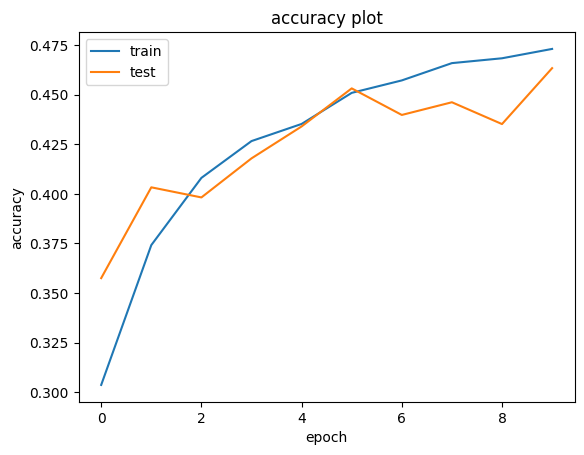

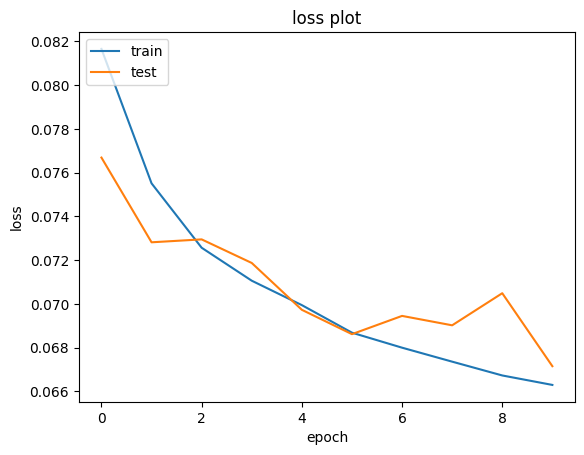

In [79]:
plot_model(log)

In [80]:
print_report(input_train, output_train, model)
print("================================================================")
print_report(input_test, output_test, model)

1563/1563 [==============================] - 8s 5ms/step
              precision    recall  f1-score   support

           0       0.50      0.57      0.53      5000
           1       0.68      0.53      0.60      5000
           2       0.35      0.37      0.36      5000
           3       0.36      0.26      0.30      5000
           4       0.44      0.41      0.43      5000
           5       0.37      0.47      0.42      5000
           6       0.51      0.53      0.52      5000
           7       0.61      0.53      0.57      5000
           8       0.64      0.62      0.63      5000
           9       0.51      0.61      0.56      5000

    accuracy                           0.49     50000
   macro avg       0.50      0.49      0.49     50000
weighted avg       0.50      0.49      0.49     50000

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      1000
           1       0

#### Q2-3-1

MSE has much worse performance compared to Categorical Crossentropy performance. so we use MSE for loss function.

#### Q2-3-2

Why it is not suitable to use MSE for classification ?

As we see, accuracy and loss both don't have good values and don't change so much. now we check why this happens. We take the argmax of the probability of each training instance in classification.<br>
Now suppose our probability outputs are 0.505 and 0.495 . So the predict of class is class 1. Now consider it is ture predict. but if we use MSE, it will return zero as a loss value, but the binary cross-entropy returns "tangible" value. And, if with all data samples, the trained model predicts a similar type of probability, then binary cross-entropy effectively returns loss value, whereas MSE returns 0.<br>
MSE application is in regresssion. So we can see here MSE does not make enough Accuracy for us.<br>

### Q2-4 - Regularization effect

In [81]:
DROPOUT_RATE = 0.1
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, input_dim=input_train.shape[1], activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
model.add(keras.layers.Dense(128, activation=partial(tf.nn.leaky_relu, alpha=LEARNING_RATE)))
model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax))

model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE / 10), loss=losses.categorical_crossentropy, metrics=["accuracy"])
log = model.fit(input_train, one_hot_of_output_train, validation_data=(input_test, one_hot_of_output_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.9367 - accuracy: 0.2891 - val_loss: 1.7510 - val_accuracy: 0.3656
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.7939 - accuracy: 0.3488 - val_loss: 1.6915 - val_accuracy: 0.3920
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7316 - accuracy: 0.3759 - val_loss: 1.6530 - val_accuracy: 0.4076
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6990 - accuracy: 0.3918 - val_loss: 1.6079 - val_accuracy: 0.4358
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6770 - accuracy: 0.3975 - val_loss: 1.5882 - val_accuracy: 0.4284
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6587 - accuracy: 0.4037 - val_loss: 1.5953 - val_accuracy: 0.4216
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6433 - accuracy: 0.4113 - val_loss: 1.5644 -

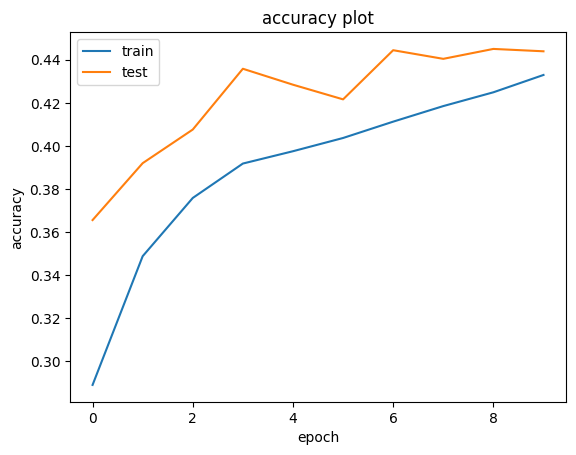

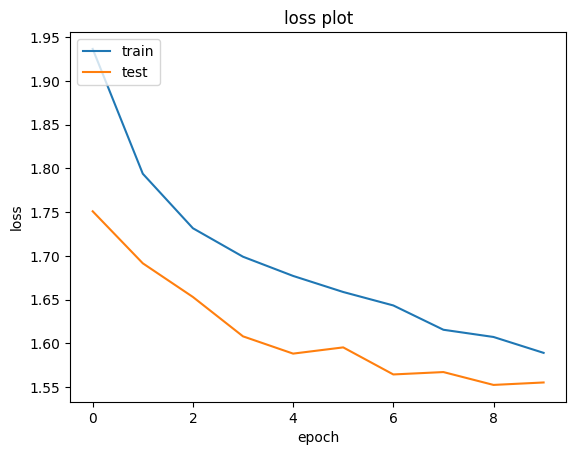

In [82]:
plot_model(log)

In [83]:
print_report(input_train, output_train, model)
print("================================================================")
print_report(input_test, output_test, model)

1563/1563 [==============================] - 8s 5ms/step
              precision    recall  f1-score   support

           0       0.63      0.39      0.48      5000
           1       0.63      0.47      0.54      5000
           2       0.38      0.19      0.25      5000
           3       0.32      0.41      0.36      5000
           4       0.42      0.38      0.40      5000
           5       0.53      0.22      0.31      5000
           6       0.41      0.64      0.50      5000
           7       0.48      0.60      0.54      5000
           8       0.60      0.57      0.58      5000
           9       0.39      0.72      0.51      5000

    accuracy                           0.46     50000
   macro avg       0.48      0.46      0.45     50000
weighted avg       0.48      0.46      0.45     50000

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.62      0.38      0.47      1000
           1       0

Dropout method : for approximates training a lot of neural networks that have different architectures in parallel. this method used in regularization.<br>
Some number of layer outputs are ignored or dropped out randomly during training. Making the layer look like and be treated like a layer with a different num of nodes and connectivity to the prior layer cause this.